## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__
# keras.__version__

'2.13.0'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print('GPU Name:')
    !nvidia-smi -L

Num GPUs Available:  0


In [4]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

## Daten importieren

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

Bilder sind keine 1D arrays of size 784 aber 28x28 array

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

## Aufteilung in Train/Test und Validation Set

In [9]:
val_sample_size = 5000

In [10]:
# Aufteilung in train und validation set und Normalisierung (0-1) von typ float

X_valid, X_train = X_train_full[:val_sample_size]/ 255.0, X_train_full[val_sample_size:] / 255.0 
y_valid, y_train = y_train_full[:val_sample_size], y_train_full[val_sample_size:]

X_test  = X_test/ 255.0

#Durch 255 Teilen um Farbwerte zwischen 0-1 zu skalieren

In [11]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

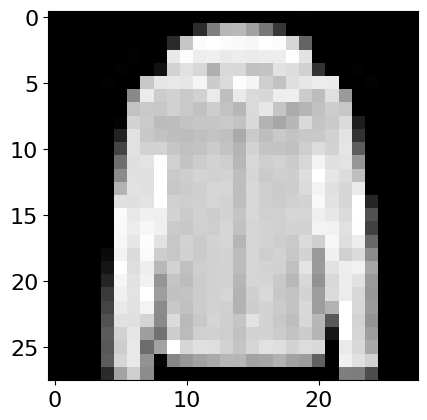

In [13]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [14]:
X_train[0].shape

(28, 28)

## Model with Sequential API

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Konvertiert jedes Bild in ein 1D-Array
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # 10 Output Neuronen --> 1 für jede Klasse, softmax activation da Klassen exklusiv sind

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"]) #learning rate by default = 0.01

Falls Trainingsset deutlich besser als Testset performt  --- Overfitting Gefahr

In [19]:
dense_epochs = 30

In [20]:
history = model.fit(X_train,y_train, epochs=dense_epochs, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7231 - accuracy: 0.7654 - val_loss: 0.5050 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 2s 905us/step - loss: 0.4882 - accuracy: 0.8279 - val_loss: 0.4797 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 2s 921us/step - loss: 0.4447 - accuracy: 0.8441 - val_loss: 0.4239 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 2s 914us/step - loss: 0.4166 - accuracy: 0.8540 - val_loss: 0.3985 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 2s 922us/step - loss: 0.3968 - accuracy: 0.8590 - val_loss: 0.3879 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 2s 907us/step - loss: 0.3800 - accuracy: 0.8653 - val_loss: 0.3774 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3661 - accuracy: 0.8712 - val_loss: 0.3588 - val

## Loss plotten

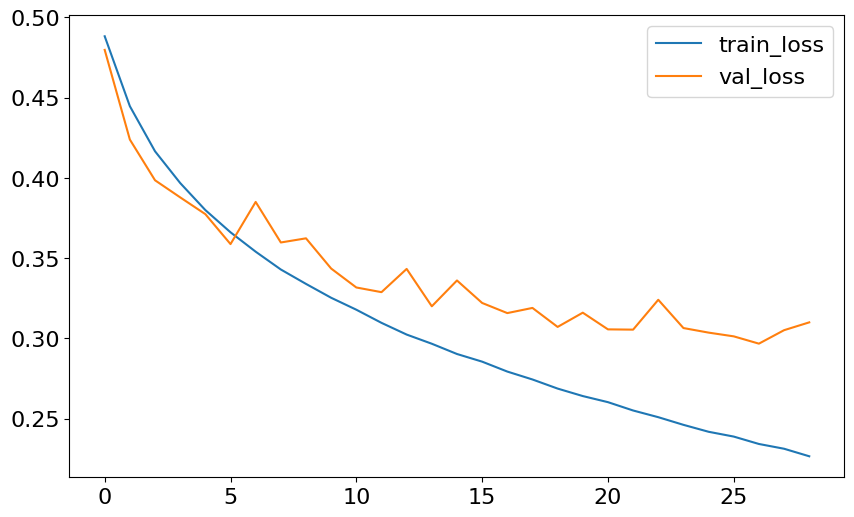

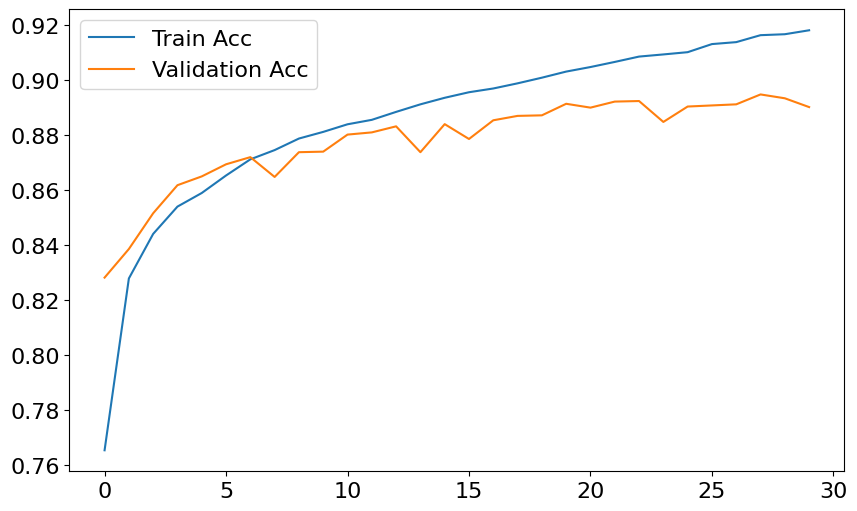

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(dense_epochs-1), y=history.history['loss'][1:], label='train_loss')
sns.lineplot(x=range(dense_epochs-1), y=history.history['val_loss'][1:], label='val_loss')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(dense_epochs), y=history.history['accuracy'], label='Train Acc')
sns.lineplot(x=range(dense_epochs), y=history.history['val_accuracy'], label='Validation Acc')
plt.show()

Hyperparameter-Tuning: 1. Learning rate verändern. 2. Anderen Optimizer 3. Anzahl Layer 4. Anzahl Neuronen per Layer 5. Activation function der Hidden-Layer

## Evaluierung

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 489us/step - loss: 0.3418 - accuracy: 0.8752


[0.34175968170166016, 0.8751999735832214]

## Predict-Methode

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

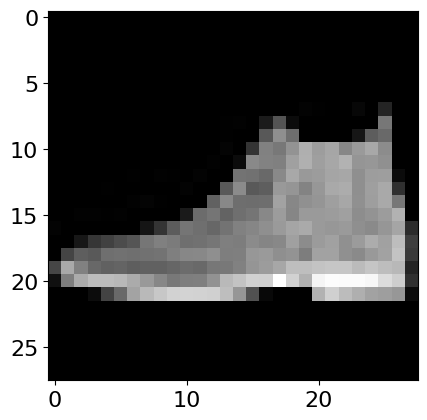

In [25]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

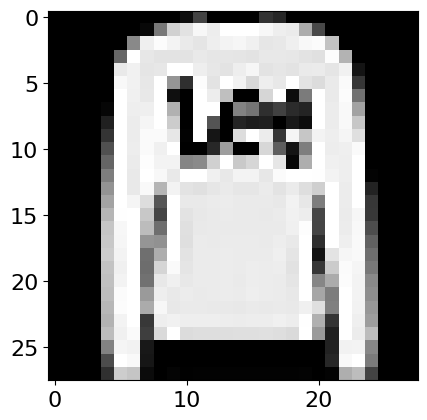

In [26]:
plt.imshow(X_test[1],cmap='gray')
plt.show()

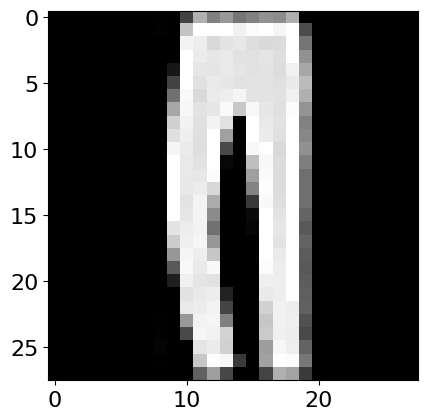

In [27]:
plt.imshow(X_test[2],cmap='gray')
plt.show()

In [28]:
y_proba = model.predict(X_test[0:3]) #Klassifizieren der Wahrscheinlichkeit für die ersten 3 Bilder im Testset
y_proba.round(2)

1/1 [==============================] - 0s 35ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = y_proba.round().astype(int)

In [30]:
y_pred_bool = y_pred.astype(bool)

In [31]:
classes = np.array(class_names * 3).reshape(3, -1)[y_pred_bool]
print(classes)

['Ankle boot' 'Pullover' 'Trouser']


## fremdes Bild einlesen

In [32]:
import cv2
img = cv2.imread('../Bilder/Hose_test.jpg',3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

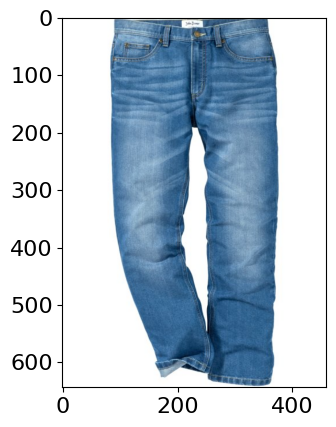

In [33]:
plt.imshow(img)
plt.show()

In [34]:
img = cv2.resize(img,(28,28))

In [35]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [36]:
img2 = cv2.bitwise_not(img)

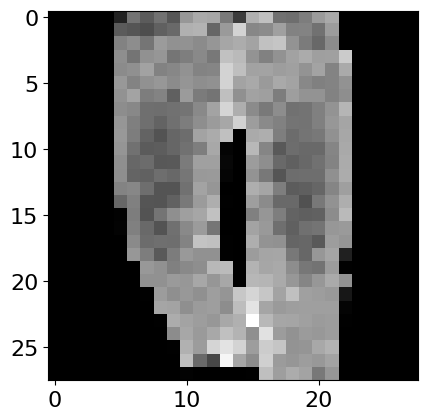

In [37]:
plt.imshow(img2,cmap='gray')
plt.show()

In [38]:
test_pic = np.array(img2).reshape((1,28,28))

In [40]:
y_pred = model.predict(test_pic)
y_pred

1/1 [==============================] - 0s 26ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
np.array(class_names)[y_pred.argmax()]

'Trouser'

## CNN - Convolutional Neural Network

In [43]:
model = keras.models.Sequential([
    keras.Input(shape=[28,28,1]),
    keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2), #each spatial dimension will be divided by factor 2
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu", padding="same"), #common practice to double the number of filters after each pooling layer
    keras.layers.Conv2D(256,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), #dense layer expects 1D array but Conv-layers have 2D array
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5), #reducing overfitting
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"])

## Reshape der Daten für CNN

In [46]:
X_train = X_train.reshape((-1,28,28,1))
X_valid = X_valid.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [47]:
X_train.shape

(55000, 28, 28, 1)

In [48]:
y_train.shape

(55000,)

In [49]:
cnn_epochs = 1

In [50]:
history = model.fit(X_train,y_train, epochs=cnn_epochs, validation_data = (X_valid, y_valid))

1719/1719 [==============================] - 107s 62ms/step - loss: 1.5808 - accuracy: 0.4025 - val_loss: 0.7992 - val_accuracy: 0.7430


1/1 [==============================] - 0s 12ms/step


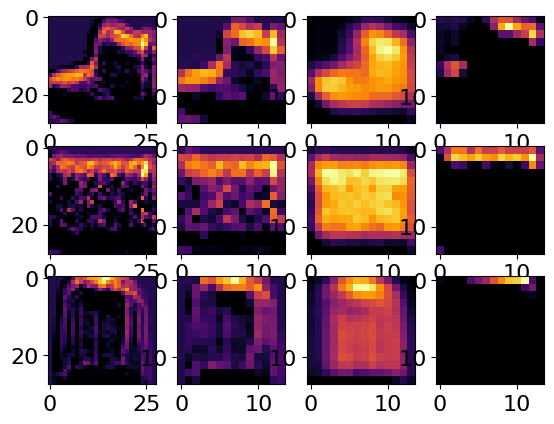

In [51]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):  
    f1 = activation_model.predict(X_valid[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(X_valid[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(X_valid[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [52]:
model.save("fashion_mnist.h5")

/opt/miniconda3/envs/gfu_s1912/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
